In [147]:
import requests
import os
import json
import sys
sys.path.append('..')


# Definisci la tua query Overpass. Questo esempio recupera i nodi con accessibilità per sedie a rotelle
# nell'area specificata. Modifica le coordinate dell'area secondo necessità.
overpass_url = "http://overpass-api.de/api/interpreter"
no_mapped_query = """
    [out:json];
    area(3600044836)->.searchArea;
    (
      node["shop"](area.searchArea);
      node["amenity"](area.searchArea);
    )->.all;

    // Filtra per escludere quelli con il tag wheelchair
    (
      node.all["wheelchair"!~"."];
    );
    out body;
    """
no_mapped_query_2 = """
    [out:json];
    area(3600044836)->.searchArea;
    (
      node["shop"](area.searchArea);
      node["amenity"](area.searchArea);
      relation["amenity"](area.searchArea);
      way["amenity"](area.searchArea);
      relation["shop"](area.searchArea);
      way["shop"](area.searchArea);
    )->.all;

    // Filtra per escludere quelli con il tag wheelchair
    (
      node.all["wheelchair"!~"."];
      way.all["wheelchair"!~"."];
      relation.all["wheelchair"!~"."];
    );
    out body;
    out center;

    """
all_query = """
    [out:json];
    area(3600044836)->.searchArea;
    (
      node["shop"](area.searchArea);
      node["amenity"](area.searchArea);
      relation["amenity"](area.searchArea);
      way["amenity"](area.searchArea);
      relation["shop"](area.searchArea);
      way["shop"](area.searchArea);
    );
    out body;
    out center;

    """

all_query_2 = """
    [out:json];
    area(3600044836)->.searchArea;
    (
      node["shop"](area.searchArea);
      node["amenity"](area.searchArea);
      relation["amenity"](area.searchArea);
      way["amenity"](area.searchArea);
      relation["shop"](area.searchArea);
      way["shop"](area.searchArea);
    );
    out body;
    """
    
all_query_3 = """
    [out:json];
    area(3600044836)->.searchArea;
    (
      node["shop"](area.searchArea);
      node["amenity"](area.searchArea);
    );
    out body;
    """
all_query_4 = """
    [out:json];
    area(3600044836)->.searchArea;
    (
      node["shop"](area.searchArea);
      node["amenity"](area.searchArea);
    );
    out body;
    out center;
    """
all_query_5 = """
    [out:json];
    area(3600044836)->.searchArea;
    (
      node["shop"](area.searchArea);
      node["amenity"](area.searchArea);
      node["tourism"](area.searchArea);
      node["leisure"](area.searchArea);
      node["public_transport"](area.searchArea);
      node["emergency"](area.searchArea);
    );
    out body;
    """
all_query_6 = """
    [out:json];
    area(3600044836)->.searchArea;
    (
      node["shop"](area.searchArea);
      node["amenity"](area.searchArea);
      node["tourism"](area.searchArea);
      node["leisure"](area.searchArea);
      node["public_transport"](area.searchArea);
      node["emergency"](area.searchArea);
      way["shop"](area.searchArea);
      way["amenity"](area.searchArea);
      way["tourism"](area.searchArea);
      way["leisure"](area.searchArea);
      way["public_transport"](area.searchArea);
      way["emergency"](area.searchArea);
      relation["shop"](area.searchArea);
      relation["amenity"](area.searchArea);
      relation["tourism"](area.searchArea);
      relation["leisure"](area.searchArea);
      relation["public_transport"](area.searchArea);
      relation["emergency"](area.searchArea);
    );
    out body;
    out center;
    """
    
all_query_7 = """
    [out:json];
    area(3600044836)->.searchArea;
    (
      node["shop"](area.searchArea);
      node["amenity"](area.searchArea);
      node["tourism"](area.searchArea);
      node["leisure"](area.searchArea);
      node["public_transport"](area.searchArea);
      node["emergency"](area.searchArea);
    );
    out body;
    out center;
    """
    
all_query_8 = """
    [out:json];
    area(3600044836)->.searchArea;
    (
      node["shop"](area.searchArea);
      node["amenity"](area.searchArea);
      node["tourism"](area.searchArea);
      node["leisure"](area.searchArea);
      node["public_transport"](area.searchArea);
      node["emergency"](area.searchArea);

    );
    out body;
    out center;
    """
    
    
mapped_query = """

    [out:json][timeout:25];
    area(3600044836)->.searchArea;
    (
      node["shop"]["wheelchair"](area.searchArea);
      way["shop"]["wheelchair"](area.searchArea);
      relation["shop"]["wheelchair"](area.searchArea);
      node["amenity"]["wheelchair"](area.searchArea);
      way["amenity"]["wheelchair"](area.searchArea);
      relation["amenity"]["wheelchair"](area.searchArea);
    );
    out body;
    >;
    out skel qt;

"""
mapped_query_2 = """
  [out:json][timeout:25];
  area(3600044836)->.searchArea;
  (
    node["shop"]["wheelchair"](area.searchArea);
    way["shop"]["wheelchair"](area.searchArea);
    relation["shop"]["wheelchair"](area.searchArea);
    node["amenity"]["wheelchair"](area.searchArea);
    way["amenity"]["wheelchair"](area.searchArea);
    relation["amenity"]["wheelchair"](area.searchArea);
  );
  out body;
  out center;
"""
mapped_query_5 = """
[out:json][timeout:50];
area(3600044836)->.searchArea;
(
  node(area.searchArea)[shop][wheelchair];
  node(area.searchArea)[shop]["toilets:wheelchair"];
  node(area.searchArea)[shop]["parking_space:disabled"];
  node(area.searchArea)[shop]["capacity:disabled"];
  node(area.searchArea)[shop][disabled];
  
  node(area.searchArea)[emergency][wheelchair];
  node(area.searchArea)[emergency]["toilets:wheelchair"];
  node(area.searchArea)[emergency]["parking_space:disabled"];
  node(area.searchArea)[emergency]["capacity:disabled"];
  node(area.searchArea)[emergency][disabled];
  
  node(area.searchArea)[amenity][wheelchair];
  node(area.searchArea)[amenity]["toilets:wheelchair"];
  node(area.searchArea)[amenity]["parking_space:disabled"];
  node(area.searchArea)[amenity]["capacity:disabled"];
  node(area.searchArea)[amenity][disabled];

  node(area.searchArea)[tourism][wheelchair];
  node(area.searchArea)[tourism]["toilets:wheelchair"];
  node(area.searchArea)[tourism]["parking_space:disabled"];
  node(area.searchArea)[tourism]["capacity:disabled"];
  node(area.searchArea)[tourism][disabled];

  node(area.searchArea)[leisure][wheelchair];
  node(area.searchArea)[leisure]["toilets:wheelchair"];
  node(area.searchArea)[leisure]["parking_space:disabled"];
  node(area.searchArea)[leisure]["capacity:disabled"];
  node(area.searchArea)[leisure][disabled];

  node(area.searchArea)[public_transport][wheelchair];
  node(area.searchArea)[public_transport]["toilets:wheelchair"];
  node(area.searchArea)[public_transport]["parking_space:disabled"];
  node(area.searchArea)[public_transport]["capacity:disabled"];
  node(area.searchArea)[public_transport][disabled];
);
out body;
"""

mapped_query_4 = """
[out:json][timeout:50];
area(3600044836)->.searchArea;
(
  node(area.searchArea)[shop][wheelchair];
  node(area.searchArea)[shop]["toilets:wheelchair"];
  node(area.searchArea)[shop]["parking_space:disabled"];
  node(area.searchArea)[shop]["capacity:disabled"];
  node(area.searchArea)[shop][disabled];
  
  node(area.searchArea)[emergency][wheelchair];
  node(area.searchArea)[emergency]["toilets:wheelchair"];
  node(area.searchArea)[emergency]["parking_space:disabled"];
  node(area.searchArea)[emergency]["capacity:disabled"];
  node(area.searchArea)[emergency][disabled];
  
  node(area.searchArea)[amenity][wheelchair];
  node(area.searchArea)[amenity]["toilets:wheelchair"];
  node(area.searchArea)[amenity]["parking_space:disabled"];
  node(area.searchArea)[amenity]["capacity:disabled"];
  node(area.searchArea)[amenity][disabled];

  node(area.searchArea)[tourism][wheelchair];
  node(area.searchArea)[tourism]["toilets:wheelchair"];
  node(area.searchArea)[tourism]["parking_space:disabled"];
  node(area.searchArea)[tourism]["capacity:disabled"];
  node(area.searchArea)[tourism][disabled];

  node(area.searchArea)[leisure][wheelchair];
  node(area.searchArea)[leisure]["toilets:wheelchair"];
  node(area.searchArea)[leisure]["parking_space:disabled"];
  node(area.searchArea)[leisure]["capacity:disabled"];
  node(area.searchArea)[leisure][disabled];

  node(area.searchArea)[public_transport][wheelchair];
  node(area.searchArea)[public_transport]["toilets:wheelchair"];
  node(area.searchArea)[public_transport]["parking_space:disabled"];
  node(area.searchArea)[public_transport]["capacity:disabled"];
  node(area.searchArea)[public_transport][disabled];
  
  way(area.searchArea)[shop][wheelchair];
  way(area.searchArea)[shop]["toilets:wheelchair"];
  way(area.searchArea)[shop]["parking_space:disabled"];
  way(area.searchArea)[shop]["capacity:disabled"];
  way(area.searchArea)[shop][disabled];
  
  way(area.searchArea)[emergency][wheelchair];
  way(area.searchArea)[emergency]["toilets:wheelchair"];
  way(area.searchArea)[emergency]["parking_space:disabled"];
  way(area.searchArea)[emergency]["capacity:disabled"];
  way(area.searchArea)[emergency][disabled];
  
  way(area.searchArea)[amenity][wheelchair];
  way(area.searchArea)[amenity]["toilets:wheelchair"];
  way(area.searchArea)[amenity]["parking_space:disabled"];
  way(area.searchArea)[amenity]["capacity:disabled"];
  way(area.searchArea)[amenity][disabled];

  way(area.searchArea)[tourism][wheelchair];
  way(area.searchArea)[tourism]["toilets:wheelchair"];
  way(area.searchArea)[tourism]["parking_space:disabled"];
  way(area.searchArea)[tourism]["capacity:disabled"];
  way(area.searchArea)[tourism][disabled];

  way(area.searchArea)[leisure][wheelchair];
  way(area.searchArea)[leisure]["toilets:wheelchair"];
  way(area.searchArea)[leisure]["parking_space:disabled"];
  way(area.searchArea)[leisure]["capacity:disabled"];
  way(area.searchArea)[leisure][disabled];

  way(area.searchArea)[public_transport][wheelchair];
  way(area.searchArea)[public_transport]["toilets:wheelchair"];
  way(area.searchArea)[public_transport]["parking_space:disabled"];
  way(area.searchArea)[public_transport]["capacity:disabled"];
  way(area.searchArea)[public_transport][disabled];
  
  relation(area.searchArea)[shop][wheelchair];
  relation(area.searchArea)[shop]["toilets:wheelchair"];
  relation(area.searchArea)[shop]["parking_space:disabled"];
  relation(area.searchArea)[shop]["capacity:disabled"];
  relation(area.searchArea)[shop][disabled];
  
  relation(area.searchArea)[emergency][wheelchair];
  relation(area.searchArea)[emergency]["toilets:wheelchair"];
  relation(area.searchArea)[emergency]["parking_space:disabled"];
  relation(area.searchArea)[emergency]["capacity:disabled"];
  relation(area.searchArea)[emergency][disabled];
  
  relation(area.searchArea)[amenity][wheelchair];
  relation(area.searchArea)[amenity]["toilets:wheelchair"];
  relation(area.searchArea)[amenity]["parking_space:disabled"];
  relation(area.searchArea)[amenity]["capacity:disabled"];
  relation(area.searchArea)[amenity][disabled];

  relation(area.searchArea)[tourism][wheelchair];
  relation(area.searchArea)[tourism]["toilets:wheelchair"];
  relation(area.searchArea)[tourism]["parking_space:disabled"];
  relation(area.searchArea)[tourism]["capacity:disabled"];
  relation(area.searchArea)[tourism][disabled];

  relation(area.searchArea)[leisure][wheelchair];
  relation(area.searchArea)[leisure]["toilets:wheelchair"];
  relation(area.searchArea)[leisure]["parking_space:disabled"];
  relation(area.searchArea)[leisure]["capacity:disabled"];
  relation(area.searchArea)[leisure][disabled];

  relation(area.searchArea)[public_transport][wheelchair];
  relation(area.searchArea)[public_transport]["toilets:wheelchair"];
  relation(area.searchArea)[public_transport]["parking_space:disabled"];
  relation(area.searchArea)[public_transport]["capacity:disabled"];
  relation(area.searchArea)[public_transport][disabled];
);
out body;
"""


all_query_9 = """
[out:json][timeout:50];
area(3600044836)->.searchArea;
(
  node(area.searchArea)[shop];
  node(area.searchArea)[emergency];
  node(area.searchArea)[amenity];
  node(area.searchArea)[tourism];
  node(area.searchArea)[leisure];
  node(area.searchArea)[public_transport];
  
);
out body;
"""

accessibile_query_2 = """
[out:json][timeout:50];
area(3600044836)->.searchArea;
(
  node(area.searchArea)[shop][wheelchair=yes];
  node(area.searchArea)[shop]["toilets:wheelchair"=yes];
  node(area.searchArea)[shop]["parking_space:disabled=yes"];
  node(area.searchArea)[shop]["capacity:disabled"];
  node(area.searchArea)[shop][disabled];
  
  node(area.searchArea)[emergency][wheelchair=yes];
  node(area.searchArea)[emergency]["toilets:wheelchair"=yes];
  node(area.searchArea)[emergency]["parking_space:disabled=yes"];
  node(area.searchArea)[emergency]["capacity:disabled"];
  node(area.searchArea)[emergency][disabled];
  
  node(area.searchArea)[amenity][wheelchair=yes];
  node(area.searchArea)[amenity]["toilets:wheelchair"=yes];
  node(area.searchArea)[amenity]["parking_space:disabled=yes"];
  node(area.searchArea)[amenity]["capacity:disabled"];
  node(area.searchArea)[amenity][disabled];

  node(area.searchArea)[tourism][wheelchair=yes];
  node(area.searchArea)[tourism]["toilets:wheelchair"=yes];
  node(area.searchArea)[tourism]["parking_space:disabled=yes"];
  node(area.searchArea)[tourism]["capacity:disabled"];
  node(area.searchArea)[tourism][disabled];

  node(area.searchArea)[leisure][wheelchair=yes];
  node(area.searchArea)[leisure]["toilets:wheelchair"=yes];
  node(area.searchArea)[leisure]["parking_space:disabled=yes"];
  node(area.searchArea)[leisure]["capacity:disabled"];
  node(area.searchArea)[leisure][disabled];

  node(area.searchArea)[public_transport][wheelchair=yes];
  node(area.searchArea)[public_transport]["toilets:wheelchair"=yes];
  node(area.searchArea)[public_transport]["parking_space:disabled=yes"];
  node(area.searchArea)[public_transport]["capacity:disabled"];
  node(area.searchArea)[public_transport][disabled];
);
out body;
"""

accessibile_query_2 = """
[out:json][timeout:50];
area(3600044836)->.searchArea;
(
  node(area.searchArea)[shop][wheelchair=no];
  node(area.searchArea)[shop]["toilets:wheelchair"=no];
  node(area.searchArea)[shop]["parking_space:disabled"];
  node(area.searchArea)[shop]["capacity:disabled"];
  node(area.searchArea)[shop][disabled];
  
  node(area.searchArea)[emergency][wheelchair=no];
  node(area.searchArea)[emergency]["toilets:wheelchair"=no];
  node(area.searchArea)[emergency]["parking_space:disabled"];
  node(area.searchArea)[emergency]["capacity:disabled"];
  node(area.searchArea)[emergency][disabled];
  
  node(area.searchArea)[amenity][wheelchair=no];
  node(area.searchArea)[amenity]["toilets:wheelchair"=no];
  node(area.searchArea)[amenity]["parking_space:disabled"];
  node(area.searchArea)[amenity]["capacity:disabled"];
  node(area.searchArea)[amenity][disabled];

  node(area.searchArea)[tourism][wheelchair=yes];
  node(area.searchArea)[tourism]["toilets:wheelchair"=yes];
  node(area.searchArea)[tourism]["parking_space:disabled"];
  node(area.searchArea)[tourism]["capacity:disabled"];
  node(area.searchArea)[tourism][disabled];

  node(area.searchArea)[leisure][wheelchair=yes];
  node(area.searchArea)[leisure]["toilets:wheelchair"=yes];
  node(area.searchArea)[leisure]["parking_space:disabled"];
  node(area.searchArea)[leisure]["capacity:disabled"];
  node(area.searchArea)[leisure][disabled];

  node(area.searchArea)[public_transport][wheelchair=yes];
  node(area.searchArea)[public_transport]["toilets:wheelchair"=yes];
  node(area.searchArea)[public_transport]["parking_space:disabled"];
  node(area.searchArea)[public_transport]["capacity:disabled"];
  node(area.searchArea)[public_transport][disabled];
);
out body;
"""

accessibile_query = """
    [out:json][timeout:25];
    area(3600044836)->.searchArea;
    (
      node["shop"]["wheelchair"="yes"](area.searchArea);
      node["amenity"]["wheelchair"="yes"](area.searchArea);
    );
    out body;
    >;
    out skel qt;
    """
    
accessibile_query_3 = """
[out:json][timeout:50];
area(3600044836)->.searchArea;
(
  node(area.searchArea)[shop][wheelchair=yes];
  node(area.searchArea)[emergency][wheelchair=yes];
  node(area.searchArea)[amenity][wheelchair=yes];
  node(area.searchArea)[tourism][wheelchair=yes];
  node(area.searchArea)[leisure][wheelchair=yes];
  node(area.searchArea)[public_transport][wheelchair=yes];
);
out body;
"""

limited_accessibile_query_3 = """
[out:json][timeout:50];
area(3600044836)->.searchArea;
(
  node(area.searchArea)[shop][wheelchair=limited];
  node(area.searchArea)[emergency][wheelchair=limited];
  node(area.searchArea)[amenity][wheelchair=limited];
  node(area.searchArea)[tourism][wheelchair=limited];
  node(area.searchArea)[leisure][wheelchair=limited];
  node(area.searchArea)[public_transport][wheelchair=limited];
);
out body;
"""

no_accessibile_query_3 = """
[out:json][timeout:50];
area(3600044836)->.searchArea;
(
  node(area.searchArea)[shop][wheelchair=no];
  node(area.searchArea)[emergency][wheelchair=no];
  node(area.searchArea)[amenity][wheelchair=no];
  node(area.searchArea)[tourism][wheelchair=no];
  node(area.searchArea)[leisure][wheelchair=no];
  node(area.searchArea)[public_transport][wheelchair=no];
);
out body;
"""
not_accessibile_query = """
    [out:json][timeout:25];
    area(3600044836)->.searchArea;
    (
      node["shop"]["wheelchair"="no"](area.searchArea);
      way["shop"]["wheelchair"="no"](area.searchArea);
      relation["shop"]["wheelchair"="no"](area.searchArea);
      node["amenity"]["wheelchair"="no"](area.searchArea);
      way["amenity"]["wheelchair"="no"](area.searchArea);
      relation["amenity"]["wheelchair"="no"](area.searchArea);
    );
    out body;
    >;
    out skel qt;
    """

limited_access_query = """
    [out:json][timeout:25];
    area[name="Padova"]->.searchArea;
    (
      node["shop"]["wheelchair"="limited"](area.searchArea);
      way["shop"]["wheelchair"="limited"](area.searchArea);
      relation["shop"]["wheelchair"="limited"](area.searchArea);
      node["amenity"]["wheelchair"="limited"](area.searchArea);
      way["amenity"]["wheelchair"="limited"](area.searchArea);
      relation["amenity"]["wheelchair"="limited"](area.searchArea);
    );
    out body;
    >;
    out skel qt;
    """
    
query = all_query_9
# Esegui la query e ottieni i dati
response = requests.get(overpass_url, params={'data': query})
data = response.json()
"""
unique_objects = {}
for item in data['elements']:
    if item['id'] not in unique_objects:
        unique_objects[item['id']] = item

unique_list = list(unique_objects.values())
data['elements'] = unique_list
"""


data

{'version': 0.6,
 'generator': 'Overpass API 0.7.62.1 084b4234',
 'osm3s': {'timestamp_osm_base': '2024-04-20T06:24:59Z',
  'timestamp_areas_base': '2024-04-20T02:32:10Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 187136834,
   'lat': 45.4202608,
   'lon': 11.8795095,
   'tags': {'bench': 'no',
    'bin': 'yes',
    'internet_access': 'wlan',
    'internet_access:fee': 'no',
    'internet_access:operator': 'Padova WiFi',
    'lit': 'yes',
    'name': 'Borgomagno',
    'public_transport': 'platform',
    'railway': 'tram_stop',
    'shelter': 'yes',
    'tactile_paving': 'yes',
    'tram': 'yes',
    'wheelchair': 'yes'}},
  {'type': 'node',
   'id': 215541278,
   'lat': 45.4088144,
   'lon': 11.9030573,
   'tags': {'amenity': 'fuel',
    'brand': 'Q8 Easy',
    'brand:wikidata': 'Q1806948',
    'fuel:diesel': 'yes',
    'fuel:octane_95': 'yes',
    'name': 'Q8 Easy 

In [74]:
len(data['elements'])

4838

In [94]:
    
# Convertire i dati Overpass JSON in GeoJSON
features = []
for element in data['elements']:
    if element['type'] == 'node':
        lon, lat = element['lon'], element['lat']
        geometry = {"type": "Point", "coordinates": [lon, lat]}
    elif element['type'] in ['way', 'relation']:
        if 'center' in element:
            lon, lat = element['center']['lon'], element['center']['lat']
            geometry = {"type": "Point", "coordinates": [lon, lat]}
        else:
            continue  # Saltare le geometrie senza coordinate centrali
    else:
        continue

    properties = element.get('tags', {})
    feature = {"type": "Feature", "properties": properties, "geometry": geometry}
    features.append(feature)

geojson = {
    "type": "FeatureCollection",
    "features": features
}

filename = "all_query_8.geojson"

# Scrivere il GeoJSON in un file
with open(filename, 'w') as f:
    json.dump(geojson, f)


In [51]:
len(data['elements'])

9676

In [54]:
el_ids = [data['elements'][i]['id'] for i in range(len(data['elements']))]
len(list(set(el_ids)))

4838

In [27]:
os.path.abspath(filename)

'c:\\Users\\lucaf\\accessible.geojson'

In [18]:
amenities = []
for element in data['elements']:
    tags = element.get('tags', {})
    if 'amenity' in tags and tags['amenity'] not in amenities:
        amenities.append(tags['amenity'])
amenities

['restaurant',
 'fuel',
 'place_of_worship',
 'cinema',
 'kindergarten',
 'school',
 'post_office',
 'police',
 'pharmacy',
 'fast_food',
 'parking',
 'drinking_water',
 'pub',
 'bank',
 'public_building',
 'wifi',
 'library',
 'telephone',
 'fountain',
 'bench',
 'bar',
 'cafe',
 'post_box',
 'atm',
 'taxi',
 'doctors',
 'toilets',
 'bicycle_parking',
 'waste_basket',
 'bus_station',
 'studio',
 'car_wash',
 'canteen',
 'vending_machine',
 'recycling',
 'veterinary',
 'ice_cream',
 'fire_station',
 'parking_entrance',
 'compressed_air',
 'townhall',
 'gambling',
 'nightclub',
 'theatre',
 'hospital',
 'dentist',
 'driving_school',
 'courthouse',
 'bbq',
 'sanitary_dump_station',
 'motorcycle_parking',
 'charging_station',
 'university',
 'car_sharing',
 'spa',
 'clock',
 'bicycle_rental',
 'social_facility',
 'restaurant: bar',
 'lavoir',
 'shelter',
 'marketplace',
 'biergarten',
 'car_rental',
 'events_venue',
 'planetarium',
 'community_centre',
 'music_school',
 'arts_centre',
 'c

In [19]:
shops = []
for element in data['elements']:
    tags = element.get('tags', {})
    if 'shop' in tags and tags['shop'] not in shops:
        shops.append(tags['shop'])
shops

['kiosk',
 'yes',
 'supermarket',
 'convenience',
 'sports',
 'alcohol',
 'stationery',
 'hairdresser',
 'bakery',
 'butcher',
 'clothes',
 'department_store',
 'florist',
 'motorcycle',
 'optician',
 'pastry',
 'furniture',
 'bicycle',
 'newsagent',
 'fairtrade',
 'computer',
 'confectionery',
 'jewelry',
 'greengrocer',
 'garden_centre',
 'ticket',
 'food',
 'laundry',
 'vacant',
 'car_repair',
 'car',
 'mobile_lifter',
 'aquarium',
 'beverages',
 'beauty',
 'gift',
 'shoes',
 'electronics',
 'hardware',
 'music',
 'tobacco',
 'ethnic',
 'hunting',
 'books',
 'funeral_directors',
 'dry_cleaning',
 'carpet',
 'fireworks',
 'doityourself',
 'toys',
 'tailor',
 'mobile_phone',
 'winery',
 'chemist',
 'wine',
 'travel_agency',
 'estate_agent',
 'musical_instrument',
 'boutique',
 'antiques',
 'perfumery',
 'interior_decoration',
 'deli',
 'collector',
 'tyres',
 'outdoor',
 'video',
 'model',
 'trade',
 'ice_cream',
 'herbalist',
 'variety_store',
 'copyshop',
 'seafood',
 'fabric',
 'ma

In [148]:
all_points = data['elements']
len(all_points)

6015

In [101]:
mapped_points
len(mapped_points)

707

In [115]:
not_mapped_points = len(all_points) - len(mapped_points)
not_mapped_points

11297

In [144]:
limited_accessibile_points = data['elements']
len(limited_accessibile_points)

48

In [142]:
accessibile_points = data['elements']
len(accessibile_points)

146

In [146]:
not_accessible_points = data['elements']
len(not_accessible_points)

51

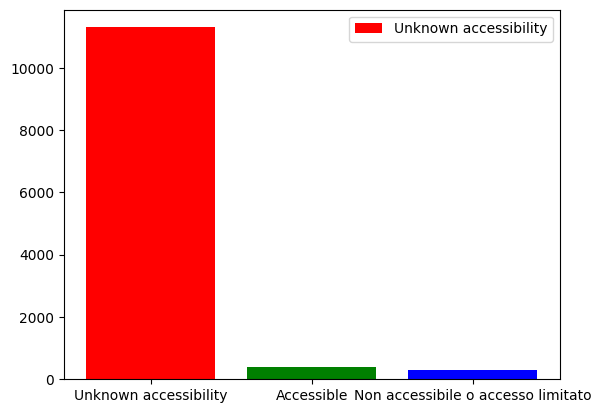

In [119]:
from matplotlib import pyplot as plt
plt.bar(['Unknown accessibility','Accessible', 'Non accessibile o accesso limitato'], [not_mapped_points,len(accessibile_points), not_or_limited_access_points], color=['red', 'green', 'blue'])
plt.legend(['Unknown accessibility','Accessible', 'Non accessibile o accesso limitato'])

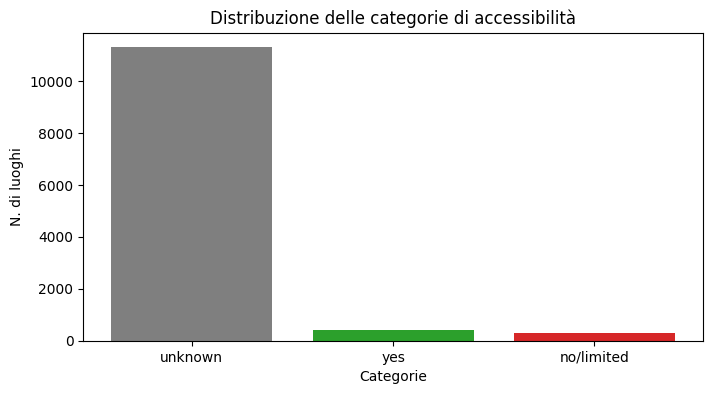

In [132]:
# Dati
categories = ['unknown', 'yes', 'no/limited'] #[' ','  ','   ']
values = [not_mapped_points,len(accessibile_points), not_or_limited_access_points]
colors = ['tab:grey', 'tab:green', 'tab:red']  # Colori per le barre

# Creazione del grafico a barre
plt.figure(figsize=(8, 4))  # Dimensione del grafico
bars = plt.bar(categories, values, color=colors)

# Aggiungere una legenda
#plt.legend(bars, ['Unknown', 'Yes', 'No/limited'])

# Etichette e titolo
plt.xlabel('Categorie')
plt.ylabel('N. di luoghi')
plt.title('Distribuzione delle categorie di accessibilità')

# Mostrare il grafico
plt.show()

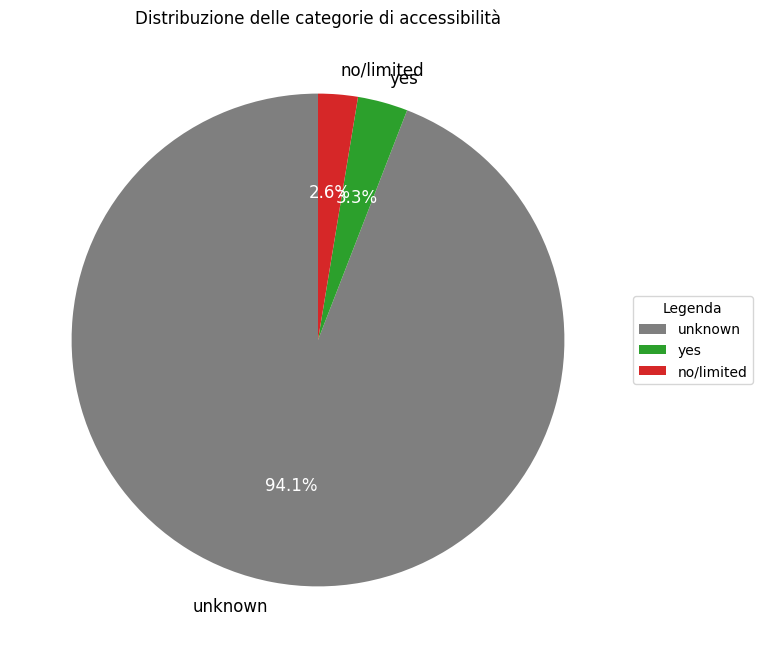

In [139]:
import matplotlib.pyplot as plt

# Dati
values = [not_mapped_points,len(accessibile_points), not_or_limited_access_points]
labels = ['unknown', 'yes', 'no/limited']
colors = ['tab:grey', 'tab:green', 'tab:red']

# Creazione del grafico a torta
plt.figure(figsize=(8, 8))  # Dimensione del grafico
wedges, texts, autotexts = plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%',
                                   startangle=90, labeldistance=1.1)

# Aggiustare le proprietà delle etichette e delle percentuali
plt.setp(texts, size=12)  # Cambiare la dimensione del testo delle etichette
plt.setp(autotexts, size=12, color="white")  # Cambiare la dimensione e il colore del testo delle percentuali

# Aggiungere una legenda
plt.legend(wedges, labels, title="Legenda", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Titolo
plt.title('Distribuzione delle categorie di accessibilità')

# Mostrare il grafico
plt.show()


In [140]:
values

[11297, 395, 312]